# iSWAP-like gate
> @author: Zhen Chen, Jiheng Duan

## About

This document will tell you how to simulated a 2-qubit iSWAP like gate

### Required Import

**The following thing must be import.**

In the current folder (despite `~\Tutorial\arb_qubit_tutorial\`), the system structure are based on file `~\System\transmon_system.py`. For using arbitrary qubit system structure, please move to the demonstration file under `~\Tutorial\arb_qubit_tutorial\`.

In [1]:
import sys
# This on is a path correcting code, which is used to find the path of qusim.
sys.path.append('../..')
import qusim.DataPlot.plot_lib as pl
import qusim.Instruments.tools as tools
import qusim.System.transmon_system as qs
import numpy as np
import matplotlib.pyplot as plt
from tqdm import *
from time import *
from sympy import*
from qutip import*

# Some useful tools
# Some intrinsic plotting function


def var_name2str(variable):
    def nested_var_name2str(value):
        if isinstance(value, list):
            return [nested_var_name2str(item) for item in value]
        else:
            for name in globals():
                if eval(name) == value:
                    return name
            return str(value)
    return nested_var_name2str(variable)

### Optional import

**The following import are optional**

In [2]:
# Print the full output
np.set_printoptions(threshold=sys.maxsize)

# auto reload
%load_ext autoreload
%autoreload 2 

## Setup system

In [3]:
def offcut(w1,w2,wcut):     
    ### caculate the detuning off frequency
    x = Symbol('x')
    z = solve((1/(w1-x)+1/(w2-x))/2-1/(w1-wcut))
    z1 = np.abs(z[0]-wcut)
    z2 = np.abs(z[1]-wcut)
    if z1>z2:
        zz = z[1]
    else:
        zz = z[0]
    return zz

In [4]:
N = None  # Maximum excitation level
w_cut = 5.0604 # coupler cutoff frequency when two qubits are on resonance 
w = [4, 5.05887, 4.1]  # Qubit frequency, GHz and sorted by Q0,C0,Q1

w_offcut = float(offcut(w[0],w[2],w_cut))
w[1] = w_offcut

# w = [4, 4.7, 4.1]  # Qubit frequency, GHz and sorted by Q0,C0,Q1
q_dim = [3 for _ in range(len(w))]  # qubit dimension
alpha = [-0.2, -0.15, -0.2]  # Anharmonicity
# cc = 200   # capacitance of C0
# c0 = 70   # capacitance of Q0
# c1 = 72   # capacitance of Q1
# c0c = 4    # capacitance between Q0 and C0
# c1c = 4.2    # capacitance between Q1 and C0"
# c12 = 0.1  # capacitance between Q0 and Q1e# # coupling strength between Q0 and C0
# g0c = 1/2*c0c/np.sqrt(c0*cc)*np.sqrt(w[0]*w[1])
# # coupling strength between Q1 and C0
# g1c = 1/2*c0c/np.sqrt(c0*cc)*np.sqrt(w[2]*w[1])
# g01 = 1/2*(c12/np.sqrt(c0*c1)+c0c*c1c/np.sqrt(c0*c1*cc**2)) * \
#     np.sqrt(w[0]*w[2])  # coupling strength between Q0 and Q1


r_dic = {
    "r12": 0.12,
    "r13": 0.015,
    "r23": 0.12
}

r = tools.r2matrix(r_dic, w)  # Coupling strength
gamma_list = None

_system = qs.qubit_system(N, q_dim, w, alpha, r, gamma_list)

state_010, E_010, index_010 = _system.get_eigenstates_energy((0,1,0))
state_000, E_000, index_000 = _system.get_eigenstates_energy((0,0,0))
state_001, E_001, index_001 = _system.get_eigenstates_energy((0,0,1))
state_100, E_100, index_100 = _system.get_eigenstates_energy((1,0,0))
state_101, E_101, index_101 = _system.get_eigenstates_energy((1,0,1))
state_011, E_011, index_011 = _system.get_eigenstates_energy((0,1,1))
state_110, E_110, index_110 = _system.get_eigenstates_energy((1,1,0))
state_111, E_111, index_111 = _system.get_eigenstates_energy((1,1,1))
state_002, E_002, index_002 = _system.get_eigenstates_energy((0,0,2))
state_200, E_200, index_200 = _system.get_eigenstates_energy((2,0,0))


In [53]:
x = Symbol('x')
z = solve(r_dic["r12"] * r_dic["r23"] * (1/(w[0]-x)+1/(w[0]-x))/2 + r_dic['r13'])
# z = solve(g1c*g0c*(1/(w[0]-x)+1/(w[1]-x))/2 + g01)


In [54]:
z

[4.32802188907529, 5.91196469228795]

## eigen energy

In [56]:
num_level = 3 # Num of level we want to see
w2_scan_space= np.linspace(4, 7, 1000)   # scan coupler frequency
energy_level_list = []
for w2 in w2_scan_space:
    dummy_list = []
    w[1] = w2
#     g0c = 1/2*c0c/np.sqrt(c0*cc)*np.sqrt(w[0]*w[1])
#     g1c = 1/2*c0c/np.sqrt(c0*cc)*np.sqrt(w[2]*w[1])
#     g01 = 1/2*(c12/np.sqrt(c0*c1)+c0c*c1c/np.sqrt(c0*c1*cc**2))*np.sqrt(w[0]*w[2])  # coupling strength between Q0 and Q1
#     r_dic = {
#     "r12": g0c,
#     "r13": g01,
#     "r23": g1c
#     }
#     r = tools.r2matrix(r_dic, w)
    _system = qs.qubit_system(N, q_dim, w, alpha, r, gamma_list)
    for j in range(0,num_level):
        dummy_list.append((_system.H.eigenenergies()[j] / np.pi/2).real)

    energy_level_list.append(dummy_list)

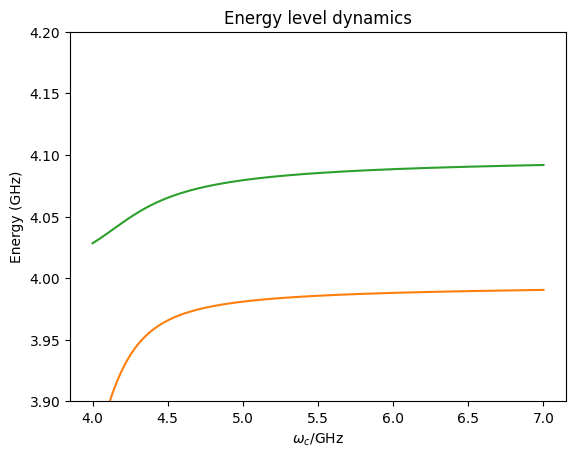

0

In [57]:
# %matplotlib notebook
plt.figure()
pl.plot_Elevel_dynamics(w2_scan_space, energy_level_list, num_level, "\omega_c", yrange = [3.9, 4.2])

###  ZZ coupling

In [58]:
num_level = 3 # Num of level we want to see
w2_scan_space= np.linspace(4, 7, 1000)   # scan coupler frequency
energy_level_list = []
for w2 in w2_scan_space:
    dummy_list = []
    w[1] = w2
#     g0c = 1/2*c0c/np.sqrt(c0*cc)*np.sqrt(w[0]*w[1])
#     g1c = 1/2*c0c/np.sqrt(c0*cc)*np.sqrt(w[2]*w[1])
#     g01 = 1/2*(c12/np.sqrt(c0*c1)+c0c*c1c/np.sqrt(c0*c1*cc**2))*np.sqrt(w[0]*w[2])  # coupling strength between Q0 and Q1
#     r_dic = {
#     "r12": g0c,
#     "r13": g01,
#     "r23": g1c
#     }
#     r = tools.r2matrix(r_dic, w)
    _system = qs.qubit_system(N, q_dim, w, alpha, r, gamma_list)
    E00 = (_system.H.eigenenergies()[0] / np.pi/2).real
    E01 = (_system.H.eigenenergies()[1] / np.pi/2).real
    E10 = (_system.H.eigenenergies()[2] / np.pi/2).real
    E11 = (_system.H.eigenenergies()[6] / np.pi/2).real
    ZZ = E11 + E00 - E01 - E10

    energy_level_list.append(ZZ)

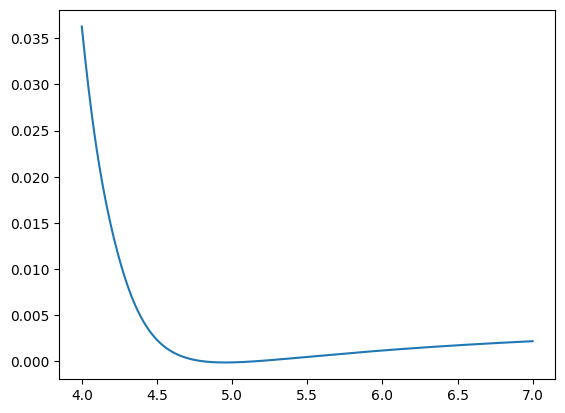

In [295]:
5.11275-0.5

4.61275

In [61]:
ind = energy_level_list.index(float(min(energy_level_list)))
w2_scan_space[ind]

4.954954954954955

## simulation options and pulse customized

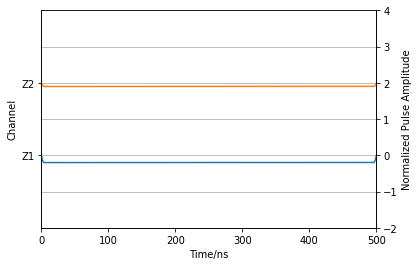

0

In [6]:
simulation_option = {
    "simulation_time": 500, # Unit in ns
    "simulation_step": 5000,
    "initial_state": [state_002,state_002,state_002,state_002,state_002,state_002] # Do multiple simulation
    # "initial_state": [state_001,state_001,state_001,state_001,state_001,state_001] # Do multiple simulation
}
pulse_sequence = [
    {
        'pulse_index': 0,
        'type': "Z", # 'XY' or 'Z'
        'pulse_shape': "cosh", # See PulseGen/pulse_shape.py
        't_delay': 0, # unit in ns
        't_width': 8, # unit in ns
        't_plateau': 492 , # unit in ns
        'freq': 0, # unit in GHz; Z pulse does not use it
        'pulse_detuning': 0,
        'phase': 0, # unit in rad;
        'amplitude': -0.1, # Z: biased frequency
        'q_index': 2, # 0, 1, 2
        'epsilon': 2
    },
        {
        'pulse_index': 1,
        'type': "Z", # 'XY' or 'Z'
        'pulse_shape': "cosh", # See PulseGen/pulse_shape.py
        't_delay': 0, # unit in ns
        't_width': 8, # unit in ns
        't_plateau': 492, # unit in ns
        'freq': 0, # unit in GHz; Z pulse does not use it
        'pulse_detuning': 0,
        'phase': 0, # unit in rad;
        'amplitude': -0.2, # Z: biased frequency
        'q_index': 1, # 0, 1, 2
        'epsilon': 2
    }
    
]
pl.plot_pulse_sequence(pulse_sequence, simulation_option)

### mesolve

In [7]:
result_list, angle_list = _system.system_dynamics_mesolve(simulation_option, pulse_sequence)   #### mesolve, dont forget!!!!!!!!!!

In [10]:
result = result_list[0]
result

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

In [11]:
# state that you want to plot each simulation
interested_state = [[state_001],
                    [state_100],
                    [state_010],
                    [state_101],
                    [state_200],
                    [state_002],
                    ]
# Convert the variable name to string in order to make legend in the plot
interested_state_label = var_name2str(interested_state)
initial_state_label = var_name2str(simulation_option["initial_state"])

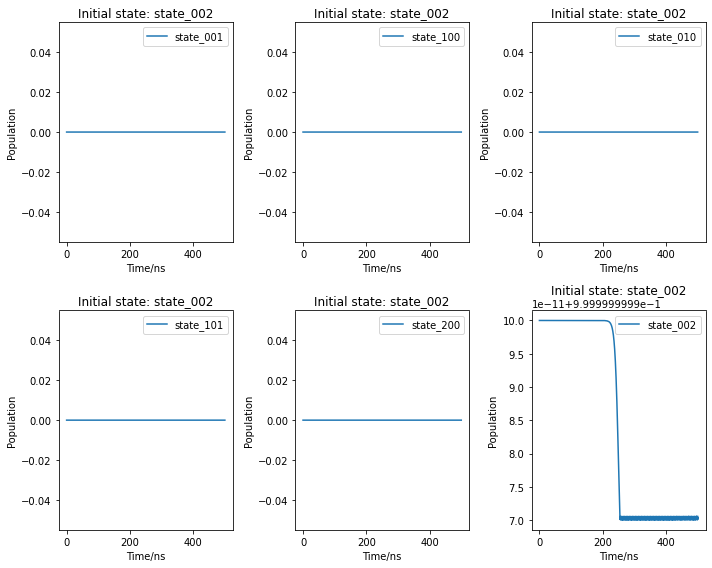

0

In [12]:
# %matplotlib notebook
# plot state population evolution
pl.plot_population_evolution(_system, result_list, simulation_option, interested_state, interested_state_label, initial_state_label)

## Cutoff

In [35]:
amp_list= np.linspace(-0.5, 2, 200)   # scan coupler frequency
result = []
for amp in tqdm(amp_list):
    pulse_sequence[1]['amplitude'] = amp
    _system = qs.qubit_system(N, q_dim, w, alpha, r, gamma_list)
    result_list, angle_list = _system.system_dynamics_mesolve(simulation_option, pulse_sequence)
    y = _system.get_data_list(result_list[0], simulation_option, [[state_001]])
    y = np.array(y)
    y = y.reshape(-1)
    y = y.tolist()
    result.append(y)
z = np.array(result)
z.shape

 28%|██▊       | 56/200 [10:47<27:45, 11.57s/it]


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


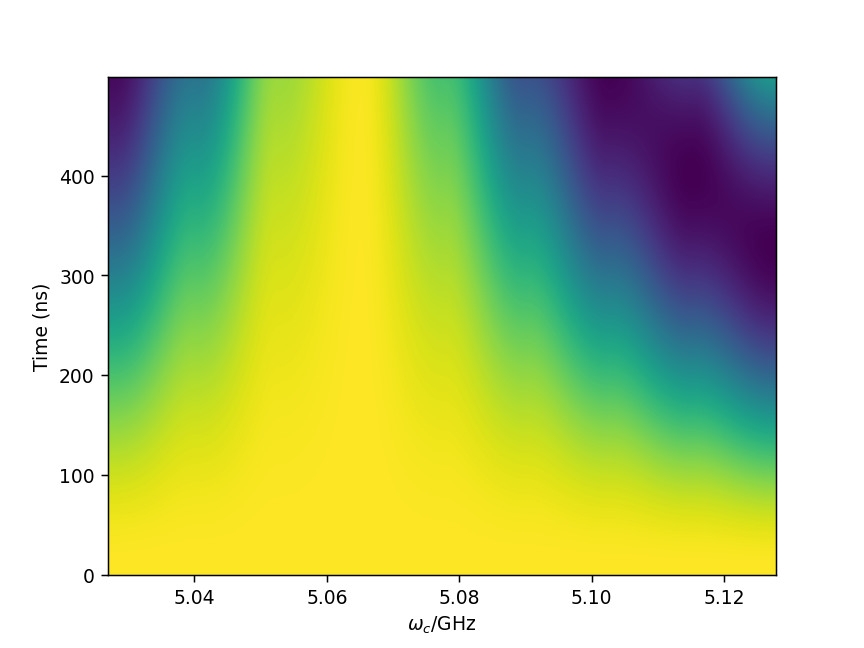

Text(0, 0.5, 'Time (ns)')

In [ ]:
plt.figure()
plt.imshow(z.T,extent = [5.05887-0.5,5.05887+2,0,500],origin = 'lower',aspect = 'auto',vmin=0)
plt.xlabel('$\omega_c$/GHz')
plt.ylabel('Time (ns)')

## Propagator and fidelity

In [230]:
# simulation_option = {
#     "simulation_time": 500, # Unit in ns
#     "simulation_step": 1000,
#     "initial_state": [state_001,state_001,state_001,state_001,state_001,state_001] # Do multiple simulation
# }
prop_result = _system.system_dynamics_propagator(simulation_option,pulse_sequence)

11.1%. Run time:  16.74s. Est. time left: 00:00:02:13
22.2%. Run time:  18.07s. Est. time left: 00:00:01:03
33.3%. Run time:  22.63s. Est. time left: 00:00:00:45
40.7%. Run time:  26.93s. Est. time left: 00:00:00:39
51.9%. Run time:  28.10s. Est. time left: 00:00:00:26
63.0%. Run time:  34.64s. Est. time left: 00:00:00:20
70.4%. Run time:  36.44s. Est. time left: 00:00:00:15
81.5%. Run time:  39.46s. Est. time left: 00:00:00:08
92.6%. Run time:  44.43s. Est. time left: 00:00:00:03
100.0%. Run time:  48.09s. Est. time left: 00:00:00:00
Total run time:  48.24s


In [ ]:
U = prop_result[-1]  ## get the Unitary 

### caculate the ideal Unitary 

In [328]:
U = prop_result[-1]  ## get the Unitary 
s00 = state_000
s01 = state_001
s10 = state_100
s11 = state_101
s00d = state_000.dag()
s01d = state_001.dag()
s10d = state_100.dag()
s11d = state_101.dag()

a00 = s00d*U*s00.data
a01 = s00d*U*s01.data
a02 = s00d*U*s10.data
a03 = s00d*U*s11.data
a10 = s01d*U*s00.data
a11 = s01d*U*s01.data
a12 = s01d*U*s10.data
a13 = s01d*U*s11.data
a20 = s10d*U*s00.data
a21 = s10d*U*s01.data
a22 = s10d*U*s10.data
a23 = s10d*U*s11.data
a30 = s11d*U*s00.data
a31 = s11d*U*s01.data
a32 = s11d*U*s10.data
a33 = s11d*U*s11.data
# print(a00,a01,a02,a03,a10,a11,a12,a13,a20,a21,a22,a23,a30,a31,a32,a33)
m = np.array([[a00,a01,a02,a03],[a10,a11,a12,a13],[a20,a21,a22,a23],[a30,a31,a32,a33]])
m = m.reshape(4,4)
a = Qobj(m, dims= [[2, 2], [2, 2]])
a

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[-7.12652831e-01-7.01524540e-01j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  1.22819124e-06-9.93674988e-07j]
 [ 0.00000000e+00+0.00000000e+00j  9.41649636e-01-2.58694821e-01j
   1.05940549e-01-1.87529793e-01j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.05941434e-01-1.87531630e-01j
   2.64450546e-01+9.40048653e-01j  0.00000000e+00+0.00000000e+00j]
 [ 4.05417057e-06+2.05597694e-05j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -8.04963797e-01-5.92606794e-01j]]

In [329]:
u00 = a.data[0,0]
u11 = a.data[1,1]/u00
u12 = a.data[1,2]/u00
u21 = a.data[2,1]/u00
u22 = a.data[2,2]/u00
u33 = a.data[3,3]/u00
ue00 = ae.data[0,0]
ue11 = ae.data[1,1]/ue00
ue12 = ae.data[1,2]/ue00
ue21 = ae.data[2,1]/ue00
ue22 = ae.data[2,2]/ue00
ue33 = ae.data[3,3]/ue00

In [330]:
a/u00

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -1.78184660e-07+1.56973473e-06j]
 [ 0.00000000e+00+0.00000000e+00j -4.89583256e-01+8.44940852e-01j
   5.60573182e-02+2.07961300e-01j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  5.60579758e-02+2.07963230e-01j
  -8.47919524e-01-4.84404585e-01j  0.00000000e+00+0.00000000e+00j]
 [-1.73122130e-05-1.18077509e-05j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  9.89377314e-01-1.42377419e-01j]]

In [331]:
def fsim_zhen(u11,u12,u21,u22,u33,result_list):
    p0 = state_001.dag()*result_list[0].states[-1].data
    p1 = state_100.dag()*result_list[0].states[-1].data
    p0 = np.abs(p0)
    p1 = np.abs(p1)
    theta = np.arctan(p1/p0)[0][0]
#     phi4 = (u12/(-1j*np.sin(theta)))
    phi2 = (u21/(-1j*np.sin(theta)))
    phi1 = (u22/(np.cos(theta)))
    phi4 = (u11/(np.cos(theta))/phi2)
    phi3 = 1
    phi = u33/phi2/phi4/phi1
    print('theta:', theta)
    print('phi:', phi)
    print('phi1:', phi1)
    print('phi2:', phi2)
    print('phi3:', phi3)
    print('phi4:', phi4)
    return theta, phi, phi1,phi2, phi3, phi4      

In [332]:
theta, phi, phi1,phi2, phi3,phi4  = fsim_zhen(u11,u12,u21,u22,u33,result_list)  ### parameters for fsim gate

theta: 0.21708532035611208
phi: (0.9268890789769029+0.37416830548403024j)
phi1: (-0.8682990478514397-0.4960471217273543j)
phi2: (-0.965545108031335+0.2602695886744073j)
phi3: 1
phi4: (0.7092617440285132-0.7049380867918562j)


In [333]:
ph1 = np.conj(phi1)         
ph2 = np.conj(phi2)
ph3 = np.conj(phi3)
ph4 = np.conj(phi4)
R1 = np.array([[1,0,0,0],[0,ph2,0,0],[0,0,ph1,0],[0,0,0,ph1*ph2]])
R2 = np.array([[1,0,0,0],[0,ph4,0,0],[0,0,ph3,0],[0,0,0,ph3*ph4]])
r1 = Qobj(R1, dims=[[2,2],[2,2]])
r2 = Qobj(R2, dims=[[2,2],[2,2]])   #####  generate the single qubit gates

In [334]:
Uni = a/u00
Ug = r2*Uni*r1    ### Unitary without single qubit phase
ui = np.array([[1,0,0,0],[0,np.cos(theta),-1j*np.sin(theta),0],[0,-1j*np.sin(theta),np.cos(theta),0],[0,0,0,phi]])
Ui = Qobj(ui, dims=[[2,2],[2,2]])  ### Ideal unitary

In [335]:
Ug ### Unitary without single qubit phase

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  2.24694934e-07+1.56377363e-06j]
 [ 0.00000000e+00+0.00000000e+00j  9.76536738e-01+0.00000000e+00j
   8.14888344e-07-2.15383694e-01j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00-2.15388066e-01j
   9.76535216e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [-3.95515704e-06-2.05788243e-05j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  9.26901616e-01+3.74173366e-01j]]

In [325]:
Ui ### Ideal unitary

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.97652937+0.j         0.        -0.21538427j
  0.        +0.j        ]
 [0.        +0.j         0.        -0.21538427j 0.97652937+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.92688908+0.37416831j]]

fidelity

In [339]:
f = (1/4*(Ug*Ui.dag()).tr())
f = abs(f)
print('Fidelity:{: .5%}'.format(f))##### fidelity

Fidelity: 99.97881%


## QPT

In [266]:
from qutip import (about, basis, concurrence, destroy, expect, fidelity,
                   ket2dm, mesolve, phasegate, ptrace, qeye, sigmaz, sqrtiswap,
                   tensor)
from qutip import *
from qutip.control import *


### QPT Hk. Xu 

In [302]:
from waveforms.quantum.tomo import qptInitList, qpt
from waveforms.qlisp.simulator.simple import seq2mat, applySeq

ret = []
for g in qptInitList(2):
    psi = applySeq([
        (g[0], 0), (g[1], 1)
    ])
    UU = np.array(Ug)
#     UU = np.array(iswap())
    psi_f = UU @ psi
#     print(psi_f.shape)
    psi_f = Qobj(psi_f, dims=[[2,2],[1,1]])
#     rho_f = ptrace(psi_f, (0,2))
    ret.append(np.array(psi_f))

In [298]:
len(ret)

16

In [301]:
chi = qpt(ret)
plt.figure()
plt.subplot(121)
plt.imshow(chi.real)
plt.subplot(122)
plt.imshow(chi.imag)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)

# QPT qutip

In [303]:
from qutip import *
from qutip.control import *
gates = [
    ["C-NOT", cnot()],
    ["SWAP", swap()],
    ["$i$SWAP", iswap()],
    [r"$\sqrt{i\mathrm{SWAP}}$", sqrtiswap()],
    ["S-NOT", snot()],
    [r"$\pi/2$ phase gate", phasegate(np.pi / 2)],
    ["Toffoli", toffoli()],
    ["Fredkin", fredkin()],
    ['Fsim',Ug]
]

def plt_qpt_gate(gate, figsize=(8, 6)):

    name = gate[0]
    U_psi = gate[1]

    N = len(U_psi.dims[0])  # number of qubits

    # create a superoperator for the density matrix
    # transformation rho = U_psi * rho_0 * U_psi.dag()
    U_rho = spre(U_psi) * spost(U_psi.dag())

    # operator basis for the process tomography
    op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()] for i in range(N)]

    # labels for operator basis
    op_label = [["$i$", "$x$", "$y$", "$z$"] for i in range(N)]

    # calculate the chi matrix
    chi = qpt(U_rho, op_basis)

    # visualize the chi matrix
    fig, ax = qpt_plot_combined(chi, op_label, name, figsize=figsize)

    ax.set_title(name)

    return fig, ax

C:\Users\chenz\AppData\Local\Temp\ipykernel_23056\1177510511.py:4: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  ["C-NOT", cnot()],
C:\Users\chenz\AppData\Local\Temp\ipykernel_23056\1177510511.py:5: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  ["SWAP", swap()],
C:\Users\chenz\AppData\Local\Temp\ipykernel_23056\1177510511.py:6: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  

<IPython.core.display.Javascript object>


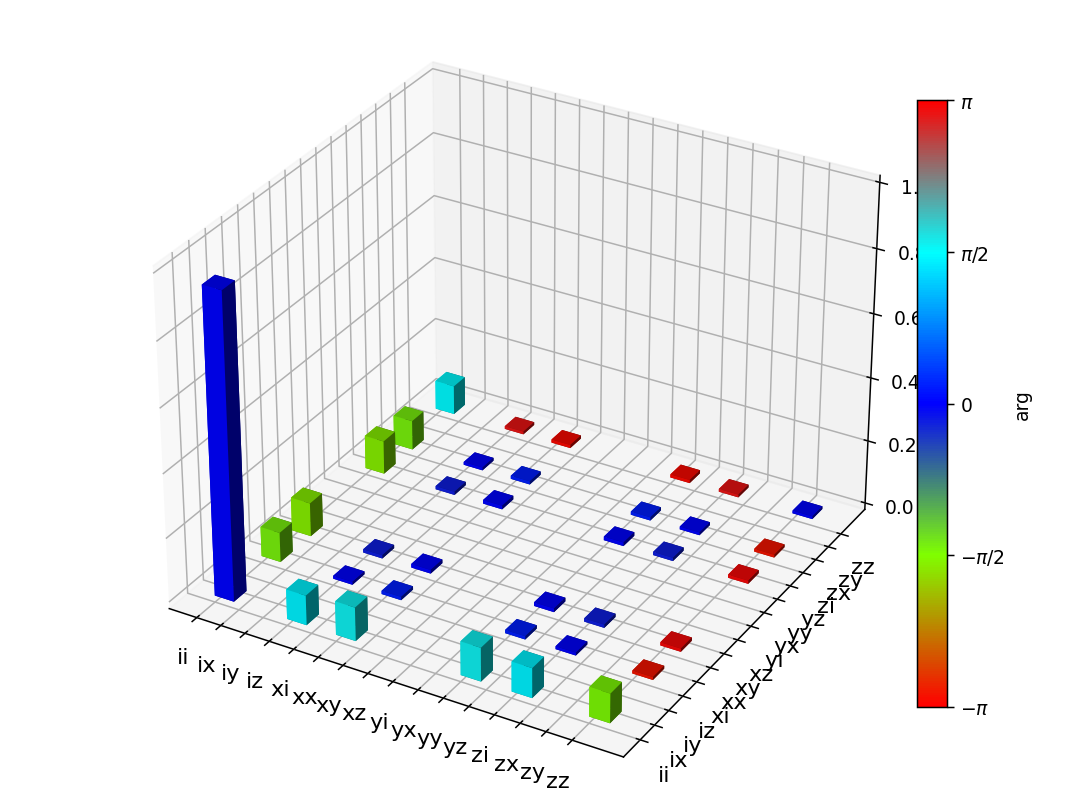

In [304]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2
fig = plt.figure(figsize=(8,6))
a = Ug
# a = aa
U_ideal = spre(a) * spost(a.dag())
# U_ideal = aa
chi = qpt(U_ideal, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

# Scan zero effective coupling

In [6]:
def closest_to_zero_index(lst):
    # Check if the list is empty
    if not lst:
        return None

    # Find the index of the element closest to zero
    min_index = 0
    min_difference = abs(lst[0])

    for i in range(1, len(lst)):
        current_difference = abs(lst[i])
        if current_difference < min_difference:
            min_difference = current_difference
            min_index = i

    return min_index

In [7]:
w_scan = [6.3, 6.65, 6.2]
wc_scan = np.linspace(6.252,6.253,10000)
r_effect_list = []
for wc in wc_scan:
    w_scan[1] = wc
    delta1, delta2 = w_scan[0] - w_scan[1], w_scan[2] - w_scan[1]
    delta = 1/(1/delta1 + 1/delta2)
    r_effect = r_dic['r12'] * r_dic['r23']/delta + r_dic['r13']
    r_effect_list.append(r_effect)
index_wc = closest_to_zero_index(r_effect_list)

Text(0.5, 0, '$\\omega_c$ (GHz)')

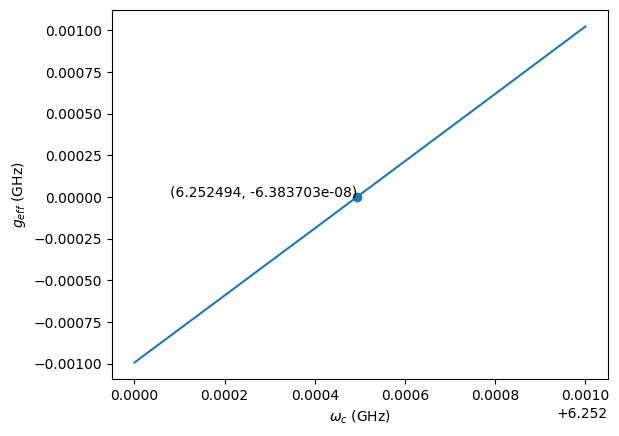

In [8]:
plt.plot(wc_scan, r_effect_list)
plt.scatter(wc_scan[index_wc], r_effect_list[index_wc])
plt.text(wc_scan[index_wc], r_effect_list[index_wc], f'({np.round(wc_scan[index_wc],6)}, {np.round(r_effect_list[index_wc],15)})', ha='right')
plt.ylabel('$g_{eff}$ (GHz)')
plt.xlabel('$\omega_c$ (GHz)')

### Scan effective eigenstate

In [9]:
energy_plus = []
energy_minus = []
w_scan = [6.3, 6.2, 6.2]
wc_scan = np.linspace(6.21,6.29,10000)
for wc in wc_scan:
    w_scan[1] = wc
    delta1, delta2 = w_scan[0] - w_scan[1], w_scan[2] - w_scan[1]
    delta = 1/(1/delta1 + 1/delta2)
    w1_eff = w[0] + r_dic['r12']**2/delta1
    w2_eff = w[2] + r_dic['r23']**2/delta2
    energy_plus.append(w1_eff+w2_eff)
    energy_minus.append(w1_eff-w2_eff)

Text(0.5, 0, '$\\omega_c$ (GHz)')

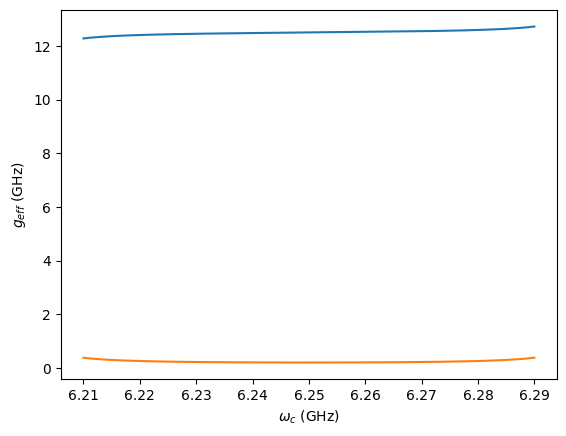

In [10]:
plt.plot(wc_scan, energy_plus, label = '$|10\rangle+|01\rangle$')
plt.plot(wc_scan, energy_minus, label = '$|10\rangle-|01\rangle$')

plt.ylabel('$g_{eff}$ (GHz)')
plt.xlabel('$\omega_c$ (GHz)')

In [384]:
U = np.array(prop_result[-1])


In [4]:
U = iswap()
U

C:\Users\chenz\AppData\Local\Temp\ipykernel_29796\2047694411.py:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  U = iswap()


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

In [99]:
  psi = applySeq([
        (g[0], 0), (g[1], 2)
    ])

In [284]:
qptInitList

<function waveforms.quantum.tomo.qptInitList(N, gates=['I', 'X', 'Y/2', 'X/2'])>

In [ ]:
from waveforms.quantum.tomo import qptInitList, qpt
from waveforms.qlisp.simulator.simple import seq2mat, applySeq

ret = []
for g in qptInitList(2):
    psi = applySeq([
        (g[0], 0), (g[1], 2)
    ])
    psi_f = U @ psi
    psi_f = Qobj(psi_f, dims=[[2,2,2],[1,1,1]])
    rho_f = ptrace(psi_f, (0,2))
    ret.append(np.array(rho_f))

In [9]:
chi = qpt(ret)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [180]:
ret

[array([[ 9.99447940e-01+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, -1.75713967e-03-1.19664563e-03j],
        [ 0.00000000e+00+0.00000000e+00j,  2.73769061e-04+0.00000000e+00j,
          2.73769061e-04-1.59919820e-18j,  0.00000000e+00+0.00000000e+00j],
        [ 0.00000000e+00+0.00000000e+00j,  2.73769061e-04+1.59919820e-18j,
          2.73769061e-04+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
        [-1.75713967e-03+1.19664563e-03j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j,  4.52199700e-06+0.00000000e+00j]]),
 array([[ 5.93185889e-03+0.j        ,  0.00000000e+00+0.j        ,
          0.00000000e+00+0.j        , -2.00082339e-04-0.00024316j],
        [ 0.00000000e+00+0.j        ,  4.19801225e-05+0.j        ,
         -2.97605282e-03+0.00573339j,  0.00000000e+00+0.j        ],
        [ 0.00000000e+00+0.j        , -2.97605282e-03-0.00573339j,
          9.94009445e-01+0.j        ,  0.00000000e+00+0.j

<IPython.core.display.Javascript object>


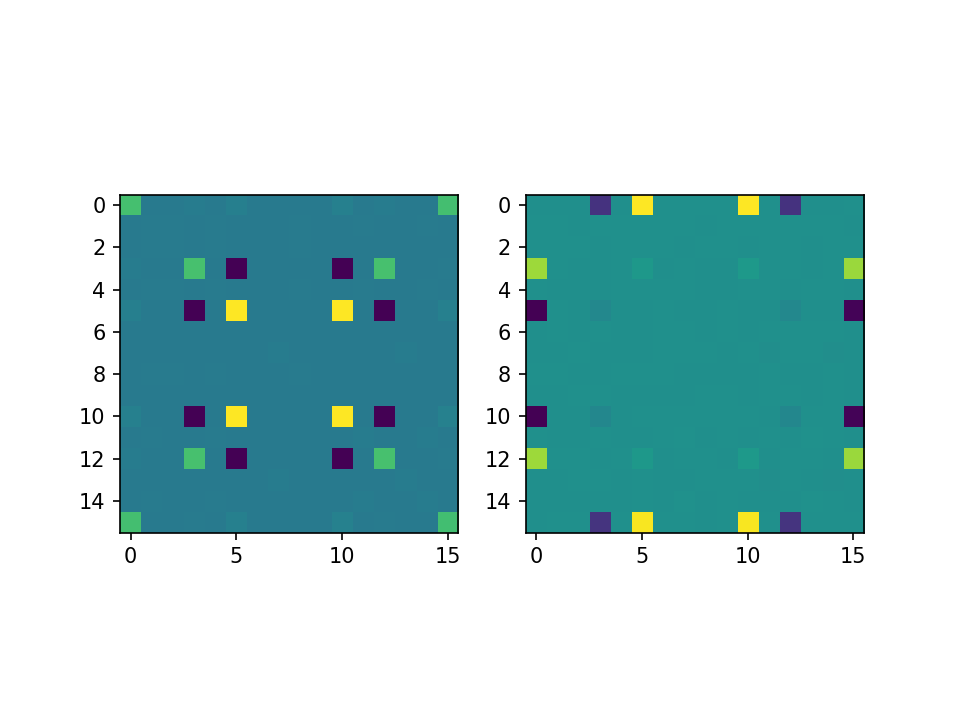

In [183]:
plt.figure()
plt.subplot(121)
plt.imshow(chi.real)
plt.subplot(122)
plt.imshow(chi.imag)


In [113]:
U = np.array(prop_result[1441])

<IPython.core.display.Javascript object>


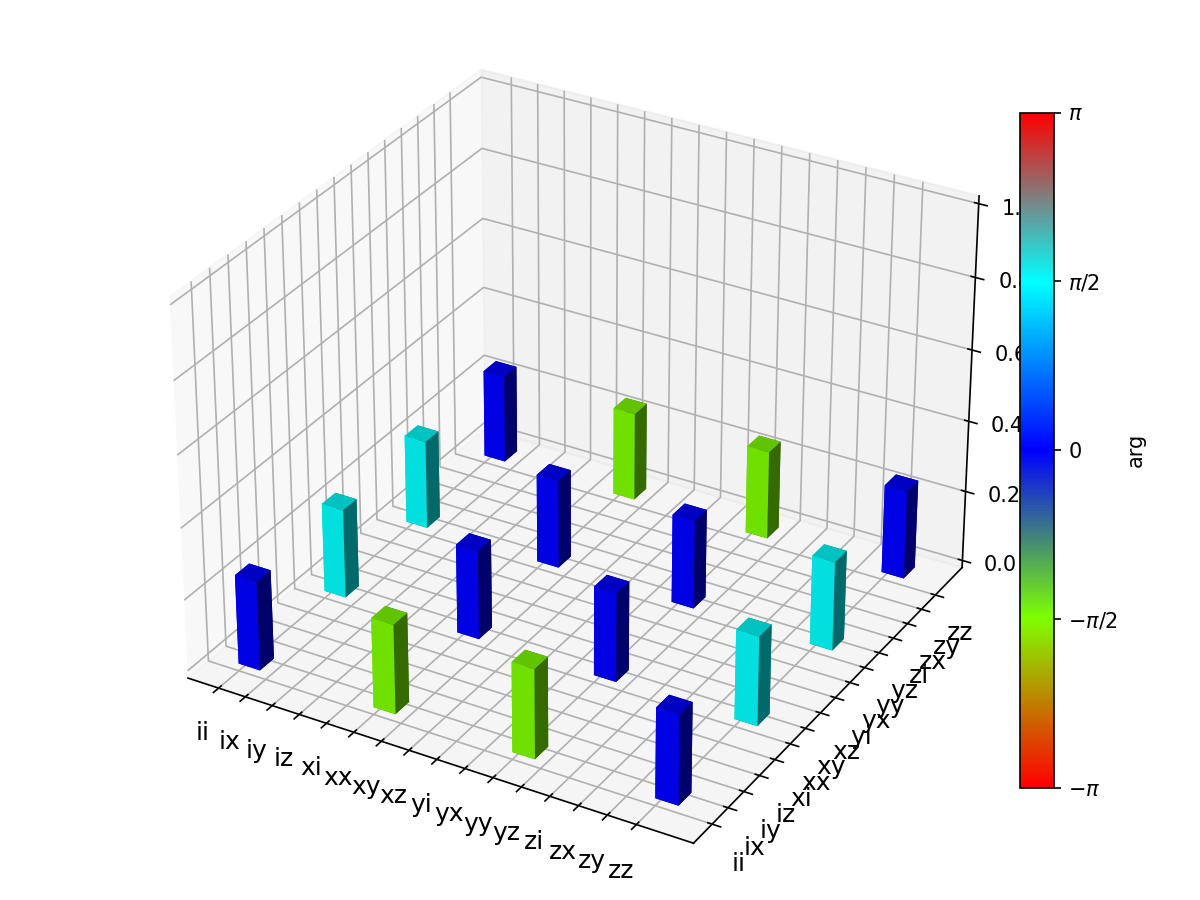

C:\Users\chenz\AppData\Local\Temp\ipykernel_19448\1386192407.py:4: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  a = iswap()


In [17]:
from qutip import *
from qutip.qip.operations import iswap
from qutip.qip.circuit import QubitCircuit

U_psi = iswap()
U_rho = spre(U_psi) * spost(U_psi.dag())

In [19]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

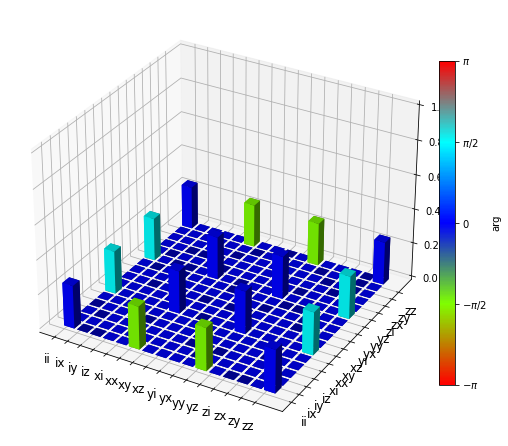

In [20]:
chi = qpt(U_rho, op_basis)
fig = qpt_plot_combined(chi, op_label, r'$i$SWAP')
plt.show()